# Solutions to Problem Set 7

## Shashank Sule 

### Problem 1 

1) Notice that the unit disk is the union of four quadrants, each with the same area as the following quadrant: 

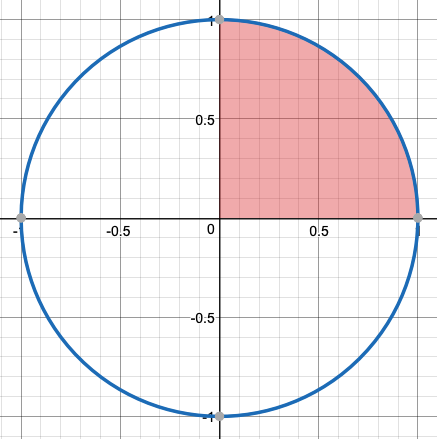

The shaded area denotes $B_2$. Then 

$$ I = 4*A(B_2) = 4\int_{B_2}dx $$ 

In [2]:
function integrate_mc(f, a, b, N)
    """ Integrate f over the hypercube [a[1], b[1]] × ... × [a[D], b[D]]
    with N samples using Monte Carlo integration.
    """
    D = length(a)
    
    S = 0.0
    
    # volume of the hypercube V = (b_1 - a_1)×(b_2 - a_2)× ... × (b_D - a_D)
    V = prod(b .- a)
    
    for i=1:N
        # sample a point uniformly from [0, 1]×...×[0,1]
        x = rand(D)
        
        # scale to [a[1], b[1]] × ... × [a[D], b[D]]
        x = a .+ (b .- a).*x
        
        S += f(x)
    end
    
    return S.* (V/N)
end

integrate_mc (generic function with 1 method)

In [3]:
using LinearAlgebra
function characteristic(x)
    if norm(x) <= 1.0 && min(x[1], x[2]) >= 0
        return 1.0
    else
        return 0.0
    end
end

characteristic (generic function with 1 method)

In [4]:
using Statistics
Est = zeros(7)
for j in 1:7
    estimates = [integrate_mc(characteristic, [0;0], [1;1], (10.0)^j) for i in 1:100]
    Est[j] = mean(estimates)
end


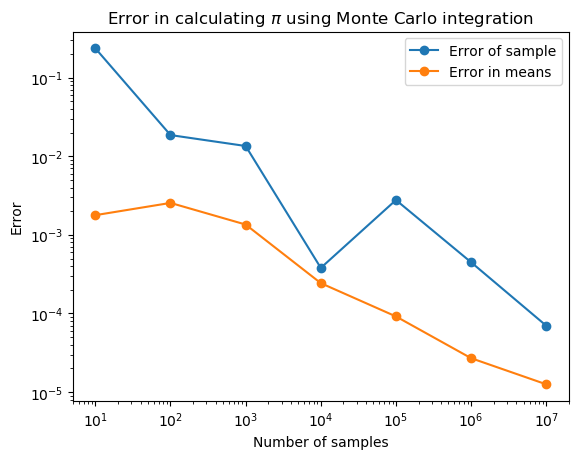

In [12]:
using LaTeXStrings
using PyPlot
Monte_carlo = [integrate_mc(characteristic, [0;0], [1;1], (10.0)^j) for j in 1:7]
loglog([(10.0)^i for i in 1:7],abs.(4 .*Monte_carlo .- π)./π, "o-", label="Error of sample");
loglog([(10.0)^i for i in 1:7],abs.(4 .*Est .- π)./π, "o-", label="Error in means");
title(L"Error in calculating $\pi$ using Monte Carlo integration");
ylabel("Error");
xlabel("Number of samples");
legend();



In [10]:
(4 .*Est .- π)./π

7-element Array{Float64,1}:
 -0.0017801969276323767 
  0.002548817524467124  
  0.0013519723524162877 
  0.00024298070895187657
 -9.16266434045337e-5   
 -2.697153932284646e-5  
 -1.2543188802010067e-5 

### Problem 2

a) Let $f_a(X)$ denote the random variable obtained by applying $f$ to the uniform random variable on $A$ and denote $f_b(X)$ similarly. Then

$$\langle f \rangle' = \frac{1}{2}\Big( \frac{1}{N/2}\sum^{N/2}f_a + \frac{1}{N/2}\sum^{N/2} f_b\Big)$$

where $ \langle f_a \rangle = \frac{1}{N/2}\sum^{N/2}f_a$ and $ \langle f_a \rangle = \frac{1}{N/2}\sum^{N/2}f_a$. 

To compute the variance we observe that we are averaging over $N/2$ i.i.d copies of $f_a$ and $f_b$ so variance and addition commute: 

$$ \sigma^{2}(\langle f \rangle') = \sigma^{2}\Big(\frac{1}{2} \frac{1}{N/2}\sum^{N/2}f_a + \frac{1}{2}\frac{1}{N/2}\sum^{N/2} f_b\Big) = \frac{1}{4}\Big( \sigma^{2}\Big(\frac{1}{N/2}\sum^{N/2}f_a\Big) + \sigma^{2}\Big(\frac{1}{N/2}\sum^{N/2} f_b\Big) \Big)$$

$$ = \frac{1}{4}\Big( \frac{4}{N^2}\frac{N}{2}(\sigma^{2}_{a}(f) + \sigma^{2}_{b}(f))\Big) = \frac{1}{2N}\Big(\sigma^{2}_{a}(f) + \sigma^{2}_{b}(f)\Big)$$

as desired. 

b) Note that $\sigma^{2}(f) = \langle f^2 \rangle - (\langle f \rangle)^2$ and that 

$$ \langle f \rangle = E[f] = \int_{R}\frac{1}{V(R)}f(x)\,dx = \int_{A}\frac{1}{V(R)}f(x) \,dx + \int_{B}\frac{1}{V(R)}f(x)\,dx $$ $$=\int_{A}\frac{1}{2V(A)}f(x) \,dx + \int_{B}\frac{1}{2V(B)}f(x)\,dx = \frac{1}{2}\Big( \int_{A}\frac{1}{V(A)}f(x) \,dx + \int_{B}\frac{1}{V(B)}f(x)\,dx\Big)$$
$$ = \frac{1}{2}\Big( \langle f_a \rangle + \langle f_b \rangle\Big)$$

Now 

$$\sigma^{2}(f) = \langle f^2 \rangle - (\langle f \rangle)^2 = \int_{R}\frac{1}{V(R)}f^2 \, dx - \Big(\frac{1}{2}\Big( \int_{A}\frac{1}{V(A)}f \,dx + \int_{B}\frac{1}{V(B)}f \,dx\Big)\Big)^2 =$$

$$\frac{1}{2}\int_{A}\frac{1}{V(A)}f^2 \,dx + \frac{1}{2}\int_{B}\frac{1}{V(B)}f^2 \,dx - \frac{1}{4}\Big(\int_A\frac{1}{V(A)}f\,dx\Big)^2 - \frac{1}{2}\int_B\frac{1}{V(B)}f\,dx\int_A\frac{1}{V(A)}f\,dx - \frac{1}{4}\Big(\int_B\frac{1}{V(B)}f\,dx\Big)^2 $$

Now notice that $- \frac{1}{4}\Big(\int_A\frac{1}{V(A)}f\,dx\Big)^2 = - \frac{1}{2}\Big(\int_A\frac{1}{V(A)}f\,dx\Big)^2 + \frac{1}{4}\Big(\int_A\frac{1}{V(A)}f\,dx\Big)^2$ and similarly for $B$. Furthermore, $\int_{A}\frac{1}{V(A)}f^2 \,dx - \Big(\int_{A}\frac{1}{V(A)}f \,dx\Big) = \sigma^{2}_a(f)$ so if we rearrange the above equation we get that 

$$ \sigma^{2}(f) = \frac{1}{2}\Big( \sigma^{2}_a(f) + \sigma^{2}_b(f)\Big) + \frac{1}{4}\Big(\int_A\frac{1}{V(A)}f\,dx\Big)^2 - \frac{1}{2}\int_B\frac{1}{V(B)}f\,dx\int_A\frac{1}{V(A)}f\,dx + \frac{1}{4}\Big(\int_B\frac{1}{V(B)}f\,dx\Big)^2 =  \frac{1}{2}\Big( \sigma^{2}_a(f) + \sigma^{2}_b(f)\Big) + \Big( \frac{\langle f_a \rangle - \langle f_b \rangle}{2} \Big)^2$$

which is what we wanted to prove. 

c) Note that the Monte carlo variance $\sigma^{2}(f_M)$ was $\frac{1}{N}\sigma^{2}(f) = \frac{1}{N}\frac{1}{2}\Big( \sigma^{2}_a(f) + \sigma^{2}_b(f)\Big) + \frac{1}{N}\Big( \frac{\langle f_a \rangle - \langle f_b \rangle}{2} \Big)^2 = \sigma^{2}(\langle f \rangle ') + \frac{1}{N}\Big( \frac{\langle f_a \rangle - \langle f_b \rangle}{2} \Big)^2$ so $\sigma^{2}(f_M) \geq \sigma^{2}(\langle f \rangle ')$ and equality holds iff $\langle f_a \rangle = \langle f_b \rangle$

d) It's effectively the same computation: 

$$ \sigma^{2}(\langle f \rangle') = \frac{1}{4}\Big( \sigma^{2}\Big(\frac{1}{N_A}\sum^{N_A}f_a\Big) + \sigma^{2}\Big(\frac{1}{N - N_A}\sum^{N - N_A} f_b\Big) \Big) = \frac{1}{4}\Big( \sigma^{2}\Big(\frac{1}{N_A}\sum^{N_A}f_a\Big) + \sigma^{2}\Big(\frac{1}{N - N_A}\sum^{N - N_A} f_b\Big) = \frac{1}{4}\Big( \frac{1}{N_{A}^{2}}N_{A}\sigma^{2}_A(f) + \frac{1}{N - N_{A}^{2}}(N-N_{A})\sigma^{2}_B(f)\Big)$$
$$  \frac{1}{4}\Big( \frac{\sigma^{2}_A(f)}{N_{A}} + \frac{\sigma^{2}_B(f)}{N - N_{A}}\Big) $$

First I'll prove a lemma: Consider the function $\frac{A^2}{x} + \frac{B^2}{N - x}$. This is maximized with respect to $x$ iff its derivative, i.e $-\frac{A^2}{x^2} + \frac{B^2}{(N - x)^2} = 0 \iff \frac{A^2}{B^2} = \Big( \frac{x}{N - x}\Big)^2 \iff \frac{A}{B} = \frac{x}{N - x}$. Rearranging yields $\frac{x}{N} = \frac{A}{A + B}$. Now considering $N_A$ as the variable we gather that $\frac{1}{4}\Big( \frac{\sigma^{2}_A(f)}{N_{A}} + \frac{\sigma^{2}_B(f)}{N - N_{A}}\Big) $ is maximized when $\frac{\sigma^{2}_A(f)}{N_{A}} + \frac{\sigma^{2}_B(f)}{N - N_{A}}$ is maximized which, from the lemma occurs when $\frac{N_A}{N} = \frac{\sigma_A}{\sigma_A + \sigma_B}$.

Finally, at such a value of $N_A$, $\frac{\sigma_B N_A}{\sigma_A} = N - N_A$ so

$$ \sigma^{2}(\langle f \rangle') = \frac{1}{4}\Big( \frac{\sigma^{2}_A(f)}{N_{A}} + \frac{\sigma^{2}_B(f)}{N - N_{A}}\Big)$$

$$ = \frac{1}{4}\Big( \frac{\sigma^{2}_A}{N\sigma_A}(\sigma_A + \sigma_B) + \frac{\sigma^{2}_B}{\sigma_B N_A}\sigma_A\Big) = \frac{1}{4}\Big( \frac{\sigma^{2}_A}{N\sigma_A}(\sigma_A + \sigma_B) + \frac{\sigma^{2}_B}{N\sigma_B\sigma_A }\sigma_A(\sigma_A + \sigma_B)\Big)$$

$$ = \frac{1}{4N}\Big( \sigma_A(\sigma_A + \sigma_B) + \sigma_B(\sigma_A + \sigma_B)\Big) = \frac{1}{4N}\Big( \sigma_A + \sigma_B\Big)^2$$

### Problem 4

a) $\hat{af}(\omega) = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}af(t)\,dt = a\frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}f(t)\,dt = a\hat{f}(\omega)$

b) $\hat{f(at)}(\omega) = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}f(at)\,dt$. Changing variables to $y = at$ we get $\frac{1}{a}dy = dt$ so $\frac{1}{a}\frac{1}{2\pi}\int_{\mathbb{R}}e^{i\frac{-\omega}{a} y}f(y)\,dy = \frac{1}{a}\hat{f}(\frac{\omega}{a})$

c) Once again, changing variables to $y = t+t_0$ yields $\hat{f(t + t_0)}(\omega) = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega y}f(y)e^{i\omega t_0}\,dy = e^{i\omega  t_0}\hat{f}$

d) Use the inversion formula: $$f(t) = \int_{\mathbb{R}}e^{i\omega t}\hat{f}(\omega)\,d\omega$$ Thus, 

$$ \hat{fg} = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}f(t)g(t) \, dt = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}\int_{\mathbb{R}}e^{i\omega' t}\hat{f}(\omega)\,d\omega'\int_{\mathbb{R}}e^{i\omega'' t}\hat{g}(\omega'')\,d\omega'' \, dt $$

$$ = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}\int_{\mathbb{R}}\hat{f}(\omega')\int_{\mathbb{R}}e^{i(\omega'' + \omega')t}\hat{g}(\omega'')\,d\omega''\,d\omega' \, dt $$

Set $h = \omega'' + \omega'$. Then 

$$ = \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}\int_{\mathbb{R}}\hat{f}(\omega')\int_{\mathbb{R}}e^{iht}\hat{g}(h - \omega')\,dh\,d\omega' \, dt $$

$$ \frac{1}{2\pi}\int_{\mathbb{R}}e^{-i\omega t}\int_{\mathbb{R}}e^{iht}\int_{\mathbb{R}}\hat{g}(h - \omega')\hat{f}(\omega')\,d\omega'\,dh \, dt $$

Here $\int_{\mathbb{R}}\hat{g}(h - \omega')\hat{f}(\omega') = \hat{f}*\hat{g}$ so the above integral is just the Fourier transform of the inverse transform of the convolution, which is the convolution itself. 

Thus $$\hat{fg} = \hat{f}*\hat{g}$$
